In [1]:
import pandas as pd
import numpy as np

In [2]:
%%time

years = [i for i in range(2010, 2019)]

df_fin = pd.DataFrame()
for year in years:
    df_year = pd.read_csv(f"/kaggle/input/precogdata/csv/cases/cases/cases_{year}.csv")
#     df_fin.concat(df_fin.sample(n=100_000, random_state=4))
    df_fin = pd.concat([df_fin, df_year.sample(n=500_000, random_state=4)])
    
df_fin = df_fin.dropna()
df_fin.drop(['date_next_list'], axis=1, inplace=True)

CPU times: user 6min 5s, sys: 43.7 s, total: 6min 49s
Wall time: 10min


In [4]:
%%time

df_temp = pd.read_csv("/kaggle/input/precogdata/csv/acts_sections/acts_sections.csv")
df_temp = df_temp[['act', 'section', 'criminal', 'ddl_case_id']]
df_temp = df_temp.dropna()

df_fin = pd.merge(
    left = df_temp, 
    right = df_fin, 
    on ="ddl_case_id",
    how = "inner")

df_temp = pd.read_csv("/kaggle/input/precogdata/csv/keys/keys/judge_case_merge_key.csv")
df_temp = df_temp.dropna()

df_fin = pd.merge(
    left = df_temp, 
    right = df_fin, 
    left_on ="ddl_case_id",
    right_on ="ddl_case_id",
    how = "inner")

df_temp = pd.read_csv("/kaggle/input/precogdata/csv/judges_clean/judges_clean.csv")
df_temp = df_temp[['female_judge', 'start_date', 'end_date', 'ddl_judge_id']]
df_temp = df_temp.dropna()

df_fin = pd.merge(
    left = df_fin, 
    right = df_temp, 
    left_on ="ddl_decision_judge_id",
    right_on = 'ddl_judge_id',
    how = "inner")

print(list(df_fin.columns))

/opt/conda/lib/python3.7/site-packages/IPython/core/magics/execution.py:1335: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


['ddl_case_id', 'ddl_filing_judge_id', 'ddl_decision_judge_id', 'act', 'section', 'criminal', 'year', 'state_code', 'dist_code', 'court_no', 'cino', 'judge_position', 'female_defendant', 'female_petitioner', 'female_adv_def', 'female_adv_pet', 'type_name', 'purpose_name', 'disp_name', 'date_of_filing', 'date_of_decision', 'date_first_list', 'date_last_list', 'female_judge', 'start_date', 'end_date', 'ddl_judge_id']
CPU times: user 4min 46s, sys: 36 s, total: 5min 22s
Wall time: 6min 5s


In [6]:
df_fin

,ddl_case_id,ddl_filing_judge_id,ddl_decision_judge_id,act,section,criminal,year,state_code,dist_code,court_no,...,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,female_judge,start_date,end_date,ddl_judge_id
0,01-01-01-201900000182017,5.0,5.0,4759.0,132871.0,1,2017,1,1,1,...,6212.0,52,2017-01-13,2017-06-28,2017-01-13,2017-06-28,0 nonfemale,06-06-2016,07-07-2018,5
1,01-01-01-201900000912016,3.0,5.0,4759.0,132871.0,1,2016,1,1,1,...,4776.0,28,2016-03-16,2016-12-22,2016-03-16,2016-12-22,0 nonfemale,06-06-2016,07-07-2018,5
2,01-01-01-201900001352016,3.0,5.0,4759.0,132871.0,1,2016,1,1,1,...,4776.0,5,2016-04-11,2017-10-25,2016-04-11,2017-10-25,0 nonfemale,06-06-2016,07-07-2018,5
3,01-01-01-201900001392017,5.0,5.0,4759.0,1123673.0,1,2017,1,1,1,...,6212.0,26,2017-03-14,2017-04-01,2017-03-14,2017-04-01,0 nonfemale,06-06-2016,07-07-2018,5
4,01-01-01-201900001532016,3.0,5.0,17353.0,1176149.0,1,2016,1,1,1,...,6253.0,5,2016-04-28,2017-08-22,2016-04-28,2017-08-22,0 nonfemale,06-06-2016,07-07-2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200531,30-02-06-201700003942018,98409.0,98409.0,4759.0,1123673.0,1,2018,30,2,6,...,6639.0,31,2018-07-06,2018-07-21,2018-07-18,2018-07-21,0 nonfemale,29-05-2017,20-08-2018,98409
200532,30-02-06-201900000792017,98409.0,98409.0,4759.0,1088091.0,1,2017,30,2,6,...,917.0,31,2017-07-31,2017-08-04,2017-08-04,2017-08-04,0 nonfemale,29-05-2017,20-08-2018,98409
200533,30-02-06-201900001582017,98409.0,98409.0,4759.0,1088091.0,1,2017,30,2,6,...,917.0,31,2017-12-05,2017-12-05,2017-12-05,2017-12-05,0 nonfemale,29-05-2017,20-08-2018,98409
200534,30-02-06-201700001192017,98462.0,98462.0,4759.0,1088091.0,1,2017,30,2,6,...,508.0,31,2017-02-23,2017-03-03,2017-03-03,2017-03-03,1 female,29-04-2016,29-05-2017,98462


In [7]:
df_fin['date_of_filing'] = pd.to_datetime(df_fin['date_of_filing'], errors='coerce')
df_fin['date_of_decision'] = pd.to_datetime(df_fin['date_of_decision'], errors='coerce')
df_fin['date_first_list'] = pd.to_datetime(df_fin['date_first_list'], errors='coerce')
df_fin['date_last_list'] = pd.to_datetime(df_fin['date_last_list'], errors='coerce')
df_fin['start_date'] = pd.to_datetime(df_fin['start_date'], errors='coerce')
df_fin['end_date'] = pd.to_datetime(df_fin['end_date'], errors='coerce')

In [10]:
df_fin = df_fin.replace('0 nonfemale', '0').replace('1 female', '1').replace('0 male', '0')
df_fin.drop(df_fin[(df_fin['female_judge'] == '-9998 unclear')].index, inplace=True)

df_fin.drop(df_fin[(df_fin['female_adv_def'] == -9998)].index, inplace=True)
df_fin.drop(df_fin[(df_fin['female_adv_def'] == -9999)].index, inplace=True)
df_fin.drop(df_fin[(df_fin['female_adv_pet'] == -9998)].index, inplace=True)
df_fin.drop(df_fin[(df_fin['female_adv_pet'] == -9999)].index, inplace=True)

df_fin.drop(df_fin[(df_fin['female_defendant'] == '-9998 unclear')].index, inplace=True)
df_fin.drop(df_fin[(df_fin['female_defendant'] == '-9999 missing name')].index, inplace=True)

df_fin.drop(df_fin[(df_fin['female_petitioner'] == '-9998 unclear')].index, inplace=True)
df_fin.drop(df_fin[(df_fin['female_petitioner'] == '-9999 missing name')].index, inplace=True)

In [12]:
to_int = ['ddl_filing_judge_id', 'ddl_decision_judge_id', 'act', 'section', 'criminal', 'year', 'state_code', 'dist_code',
            'court_no', 'type_name', 'purpose_name', 'disp_name', 'ddl_judge_id', 'female_judge', 'female_adv_def', 'female_adv_pet', 'female_defendant', 'female_petitioner']

for i in to_int:
    df_fin[i] = df_fin[i].astype('int64')
    
df_fin = df_fin.drop(['judge_position'], axis=1)

In [16]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df_fin['ddl_case_id'] = lab.fit_transform(df_fin['ddl_case_id'])
df_fin['cino'] = lab.fit_transform(df_fin['cino'])

In [17]:
df_fin.dtypes

ddl_case_id                       int64
ddl_filing_judge_id               int64
ddl_decision_judge_id             int64
act                               int64
section                           int64
criminal                          int64
year                              int64
state_code                        int64
dist_code                         int64
court_no                          int64
cino                              int64
female_defendant                  int64
female_petitioner                 int64
female_adv_def                    int64
female_adv_pet                    int64
type_name                         int64
purpose_name                      int64
disp_name                         int64
date_of_filing           datetime64[ns]
date_of_decision         datetime64[ns]
date_first_list          datetime64[ns]
date_last_list           datetime64[ns]
female_judge                      int64
start_date               datetime64[ns]
end_date                 datetime64[ns]


In [18]:
df_fin['time_taken'] = (((df_fin['end_date'] - df_fin['start_date']).dt.days + 1) > 365).astype('int64')

In [108]:
df_fin['time_taken'].mean()

0.7807486631016043

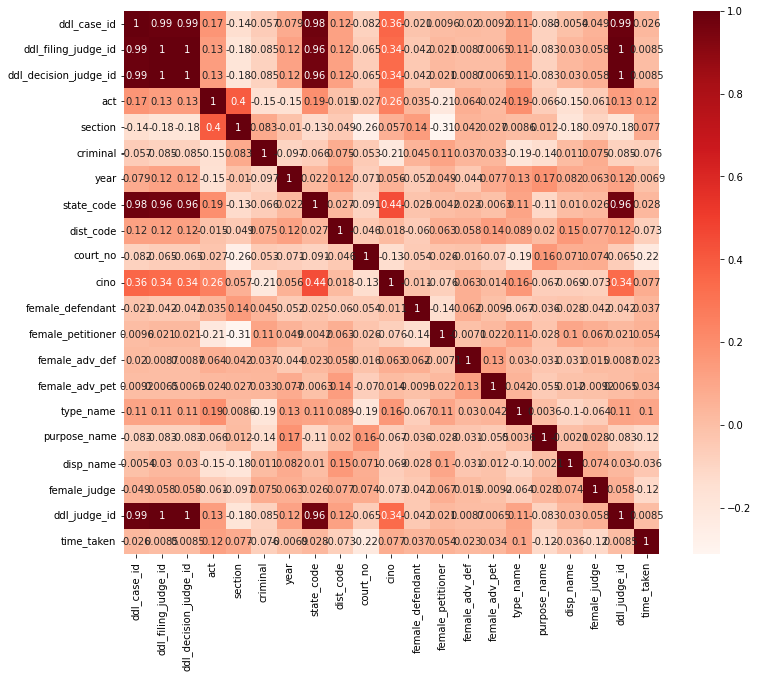

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
cor = df_fin.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
#Correlation with output variable
cor_target = abs(cor["time_taken"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.07]
relevant_features

act             0.120426
section         0.077432
criminal        0.076185
dist_code       0.073010
court_no        0.215862
cino            0.076503
type_name       0.101577
purpose_name    0.121062
female_judge    0.117407
time_taken      1.000000
Name: time_taken, dtype: float64

In [23]:
train = df_fin
feature_cols = ['act', 'year', 'court_no', 'female_adv_def', 'female_judge']

In [24]:
train['time_taken'].value_counts()

1    1752
0     492
Name: time_taken, dtype: int64

In [25]:
X = train[feature_cols]
y = train['time_taken']
print(X.shape, y.shape)

(2244, 5) (2244,)


# PREPPING TEST AND TRAIN DATA

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

---

# FIRST MODEL : Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(X_train, y_train)))

score on test: 0.8057040998217468
score on train: 0.7831253713606655


In [97]:
predictions = lr.predict(X_test)

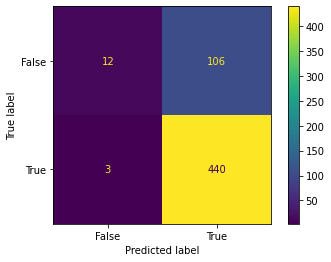

In [100]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()


confusion_matrix = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [64]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.806


---

# SECOND MODEL : Naive Bayes

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=4)

In [57]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(X_train, y_train)

print("score on test: " + str(mnb.score(X_test, y_test)))
print("score on train: "+ str(mnb.score(X_train, y_train)))

score on test: 0.41711229946524064
score on train: 0.44266191325014853


Terrible performance.

---

# THIRD MODEL : K-Nearest Neighbours

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=4)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, y_train)

print("train shape: " + str(X_train.shape))
print("score on test: " + str(knn.score(X_test, y_test)))
print("score on train: "+ str(knn.score(X_train, y_train)))

train shape: (1683, 5)
score on test: 0.8502673796791443
score on train: 0.8508615567439097


A lot better accuracy.

In [67]:
predictions = knn.predict(X_test)

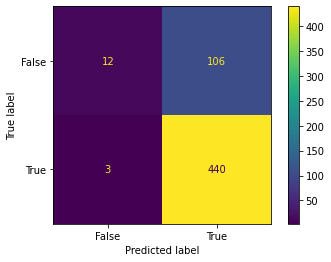

In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

confusion_matrix = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [69]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.850


---

# FOURTH MODEL : Support Vector Machine

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=4)

In [71]:
from sklearn.svm import LinearSVC

svm=LinearSVC(C=0.0001, dual=False)
svm.fit(X_train, y_train)

print("score on test: " + str(svm.score(X_test, y_test)))
print("score on train: "+ str(svm.score(X_train, y_train)))

score on test: 0.7878787878787878
score on train: 0.7694592988710636


In [72]:
predictions = svm.predict(X_test)

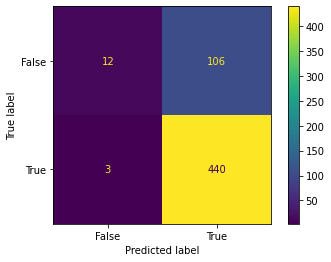

In [102]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

confusion_matrix = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [74]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.788


# FIFTH MODEL : Decision Tree

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=4)

In [76]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

score on test: 0.8146167557932263
score on train: 0.8823529411764706


In [77]:
predictions = clf.predict(X_test)

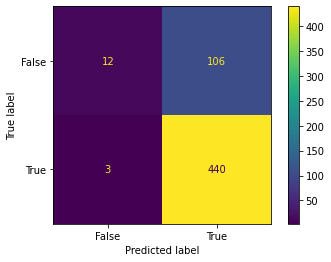

In [103]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

confusion_matrix = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [79]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.815


## Bagging Decision Tree (Ensemble Learning I)

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 

bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)

print("score on test: " + str(bg.score(X_test, y_test)))
print("score on train: "+ str(bg.score(X_train, y_train)))

score on test: 0.8431372549019608
score on train: 0.8716577540106952


In [80]:
predictions = bg.predict(X_test)

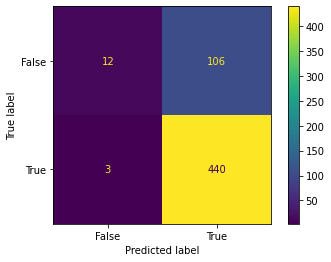

In [104]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

confusion_matrix = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [82]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.843


---

## Boosting Decision Tree (Ensemble Learning II)

In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)

print("score on test: " + str(adb.score(X_test, y_test)))
print("score on train: "+ str(adb.score(X_train, y_train)))

score on test: 0.8467023172905526
score on train: 0.8490790255496138


In [85]:
predictions = adb.predict(X_test)

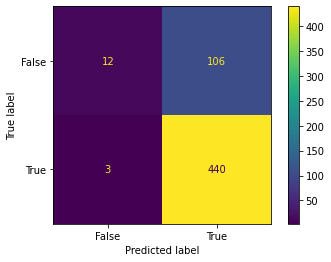

In [105]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

confusion_matrix = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [87]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.847


---

## Random Forest (Ensemble Learning III)

In [88]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)

print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(X_train, y_train)))

score on test: 0.8449197860962567
score on train: 0.8645276292335116


In [89]:
predictions = rf.predict(X_test)

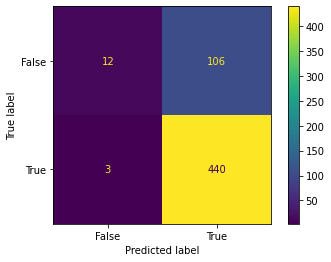

In [106]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

confusion_matrix = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [91]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.845


---

## Voting Classifier (Ensemble Learning IV)

In [92]:
from sklearn.ensemble import VotingClassifier

# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm

evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)

print("score on test: " + str(evc.score(X_test, y_test)))
print("score on train: "+ str(evc.score(X_train, y_train)))

score on test: 0.8538324420677362
score on train: 0.839572192513369


In [93]:
predictions = evc.predict(X_test)

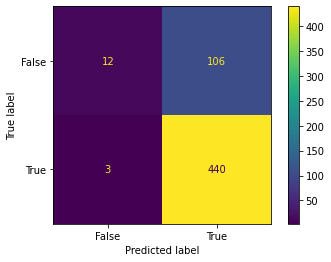

In [107]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

confusion_matrix = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [95]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.854
